***Michael McCormack***

In the Week 04 file folder you'll find the anonymous New York op ed from September 5, 2018, together with samples of writings of the main suspects. 

Use any tools you like to figure out who wrote the op ed. If you can find more writings of these people, please send them my way.



How I approached this problem - 

Let me first say that this is a incredibly interesting problem that demonstrates a very relevant application of NLP.  I had a lot of fun doing this project. 

I began by doing some exploring on the internet.  I came across this idea of determining author based on sentence structure.  Below is an example of this idea used in a Kaggle competition.

https://www.kaggle.com/christopher22/stylometry-identify-authors-by-sentence-structure/notebook

Basically the idea is that you break down each training document by sentence and add a label for the author of each sentence.  

I start off by reading in the training files into pandas DataFrames.  I then add a column indicating the author Next I concatenate all the dataframes together so

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
from nltk.tokenize import sent_tokenize

In [63]:
Coats = pd.read_table("Dan Coats.txt", header =None)
Coats.columns = ['text']
Coats['author'] = 'Dan Coats'

Mattis = pd.read_table("James Mattis.txt", header =None)
Mattis.columns = ['text']
Mattis['author'] = 'James Mattis'

Kelly = pd.read_table("John Kelly.txt", header =None)
Kelly.columns = ['text']
Kelly['author'] = 'John Kelly'

Hassett = pd.read_table("Kevin Hassett.txt", header =None)
Hassett.columns = ['text']
Hassett['author'] = 'Kevin Hassett'

Nielsen = pd.read_table("Kirstjen Nielsen.txt", header =None)
Nielsen.columns = ['text']
Nielsen['author'] = 'Kirstjen Nielsen'

Kudlow = pd.read_table("Larry Kudlow.txt", header =None)
Kudlow.columns = ['text']
Kudlow['author'] = 'Larry Kudlow'

Pence = pd.read_table("Mike Pence.txt", header =None)
Pence.columns = ['text']
Pence['author'] = 'Mike Pence'

Pompeo = pd.read_table("Mike Pompeo.txt", header =None)
Pompeo.columns = ['text']
Pompeo['author'] = 'Mike Pompeo'

train = pd.DataFrame()
train = pd.concat([Coats, Mattis,Kelly,Hassett,Nielsen,Kudlow,Pence,Pompeo])

author_to_num ={'Dan Coats': "Chicken", 'James Mattis': "Punk", 
                'John Kelly': "perp", 'Kevin Hassett': "Garbage",
                  'Kirstjen Nielsen': "Scum", 'Larry Kudlow': "Toilet", 
                'Mike Pence': "Poop", 'Mike Pompeo': "Yuck"}

train["author"].replace(author_to_num, inplace=True)
train["text"].replace('\xa0', ' ', inplace=True)  # get rid of non-breaking spaces

In [65]:
train.text = (train['text']
            .apply(sent_tokenize)
#             .apply(pd.Series)
#         #     .stack()
             )
#     #.to_frame('text')

# train = pd.DataFrame({
#       col:np.repeat(train[col].values, train["text"].str.len())
#       for col in train.columns.drop("text")}
#     ).assign(**{"text":np.concatenate(train["text"].values)})[train.columns]

print(train.iloc[0:0])
# print(train.head())
# (train.text.apply(pd.Series)
#               .stack()
#               .reset_index(level=1, drop=True)
#               .to_frame('text'))

# Convert the author strings into numbers
#train['author'] = train['author'].apply(lambda x: possibleAuthors[x])
#print(train)

# TODO split by sentence
#flat_list = [item for sublist in l for item in sublist]
#print(train.text.head())

text = train['text'].tolist()  # lines
author = train['author'].tolist()
print("there are ", len(text), "sentences")

TypeError: expected string or bytes-like object

In [45]:
print(text)

['Good evening, and sincere thanks to the Atlantic Council, Le Figaro, and the Tocqueville Foundation for organizing this important conversation about Democracy in the West.\xa0', 'I enjoyed catching up with Atlantic council board member and a long-time friend Ambassador Boyden Gray and the Atlantic Council’s Executive Vice President Damon Wilson just a few minutes ago.', 'Jeff Gedmin and I were also able to spend a few minutes together – both of us were previously posted in Berlin.', 'Last but certainly not least I would like to \xa0acknowledge former U.S. Ambassador to France and my close friend Craig Stapleton, who is here tonight.\xa0 Craig, a member of the board of directors for the Tocqueville foundation is the reason I am here.\xa0\xa0', 'So if you don’t like or agree with my remarks today, you can blame Craig.', 'There is no better venue to address the issue of democracy in the West than here in Normandy.', 'Duty prevented me from attending the D-Day ceremony, where Allied forc

In [11]:
X_train, X_test, y_train, y_test = train_test_split(vectors, author, test_size=0.25, random_state=1337)

In [16]:
"""
ngram range is the bounds for ngrams to be extracted
here, we do word unigram and bigrams


min_df is setting thresh for minimal number of 
"""

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=0)
vectors = vectorizer.fit_transform(text)
print("the tf-idf vectors have ", vectors.shape[-1], "dimensions")


svm = LinearSVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
#print(list(predictions[0:10]))

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)
print(precision, recall, fscore, support)
print("The Linear SVC model is accurate: ", round((accuracy_score(y_test, predictions) *100),2), "% of the time.")

# predictions = svm.predict(X_test)
# print(list(predictions[0:10]))
# print(y_test[:10])

the tf-idf vectors have  22747 dimensions
[0.9        0.93333333 1.         0.90909091 1.         0.82352941
 0.9        0.81954887] [0.51428571 0.875      0.6        0.83333333 0.75       0.73684211
 0.75       1.        ] [0.65454545 0.90322581 0.75       0.86956522 0.85714286 0.77777778
 0.81818182 0.90082645] [ 35  16   5  12   4  19  12 109]
The Linear SVC model is accurate:  84.91 % of the time.


In [7]:
opEd = pd.read_table("OpEd.txt", header =None)
opEd.columns = ['text']

test = opEd['text'].tolist()

X_test=vectorizer.transform(test)

# testVector = vectorizer.fit_transform(test)
# X_test=vectorizer.transform(test)
# print(vectors.shape)


predictions = svm.predict(X_test)

#predictedAuthor = mode(predictions)


predictedAuthordf = pd.DataFrame(predictions)
predictedAuthordf.columns = ['Author']
predictedAuthordf = predictedAuthordf['Author'].value_counts().reset_index()
predictedAuthordf = pd.DataFrame(predictedAuthordf)
predictedAuthordf.columns = ['Author','Count']
predictedAuthordf["Probability"] = predictedAuthordf["Count"]/(predictedAuthordf['Count'].sum())
predictedAuthordf["logLikelihood"] = np.log( predictedAuthordf["Probability"])

prediction = predictedAuthordf['logLikelihood'].idxmax()
predictedAuthor = predictedAuthordf.at[prediction,'Author']

print(predictedAuthordf,"\n\n")


#predictedAuthor = (list(possibleAuthors.keys())[list(possibleAuthors.values()).index(predictedAuthor)]) 
print("The predicted author is: ", predictedAuthor)

    Author  Count  Probability  logLikelihood
0     perp     10     0.370370      -0.993252
1   Toilet      7     0.259259      -1.349927
2     Yuck      4     0.148148      -1.909543
3  Garbage      4     0.148148      -1.909543
4  Chicken      2     0.074074      -2.602690 


The predicted author is:  perp


Visualizing prediction distribution

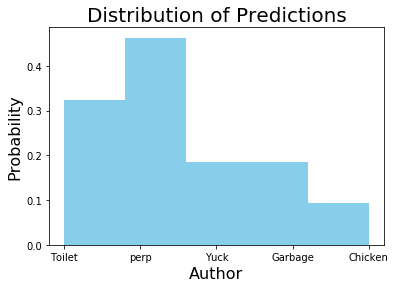

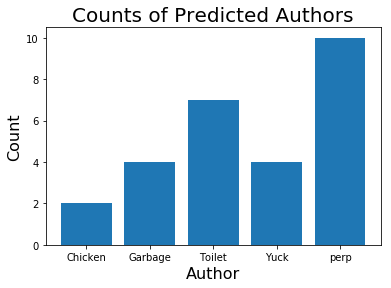

In [8]:


bins = len(set(predictions))

plt.hist(predictions, color = "skyblue", normed=True, align="mid",bins= bins)
plt.xticks(range(bins))
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Author",fontsize=16)
plt.title("Distribution of Predictions",fontsize=20)

plt.show()




c = collections.Counter(predictions)
c = sorted(c.items())
months_num = [i[0] for i in c]
freq = [i[1] for i in c]

suffixes = []
for item in months_num:
    suffixes.append(item.split()[-1])
    
    

plt.bar(suffixes, freq)
plt.xlabel("Author",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Counts of Predicted Authors", fontsize=20)
plt.show()
